In [1]:
import pandas as pd

file_path = "/Users/yuanh.er/Desktop/Season4/ITP/NONZERO_SUBSET.xlsx"

df = pd.read_excel(file_path, engine='openpyxl')

total_nonzero_count = len(df)
print(f"✅ Total number of non-zero observations: {total_nonzero_count}")


✅ Total number of non-zero observations: 117604


📌 Data volume distribution for each year:
Year
2021    29184
2022    19300
2023    34272
2024    34848
Name: count, dtype: int64


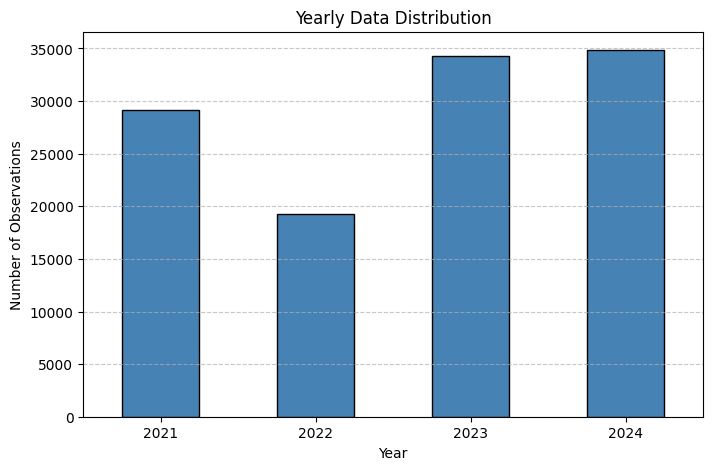

In [2]:
df['Year'] = df['dateTimeStmp'].dt.year

yearly_counts = df['Year'].value_counts().sort_index()

print("📌 Data volume distribution for each year:")
print(yearly_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
yearly_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.title("Yearly Data Distribution")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


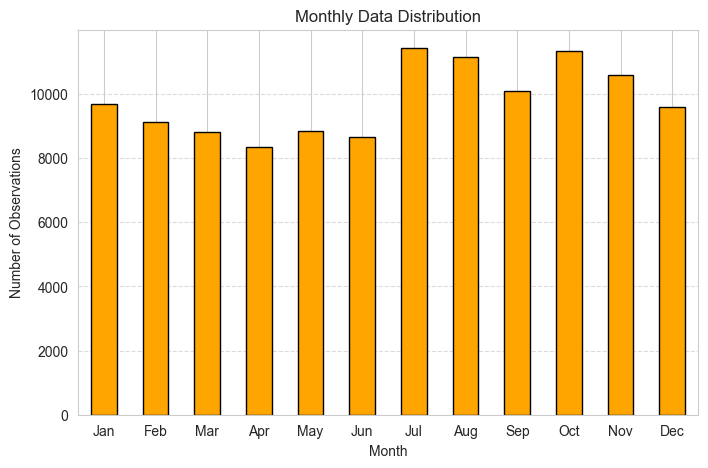

In [8]:
df['Month'] = df['dateTimeStmp'].dt.month

# 统计每个月的数据量，并按月份顺序排列
monthly_counts = df.groupby('Month').size().reindex(range(1, 13))

plt.figure(figsize=(8, 5))
monthly_counts.plot(kind='bar', color='orange', edgecolor='black')

plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Monthly Data Distribution")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

📌 Data volume distribution for each week:
Weekday
Monday       16992
Tuesday      16512
Wednesday    16608
Thursday     16512
Friday       16992
Saturday     17088
Sunday       16900
Name: count, dtype: int64


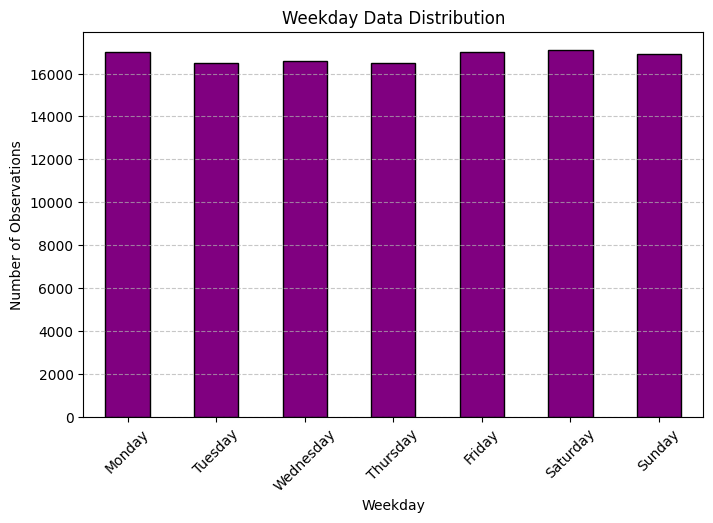

In [5]:
df['Weekday'] = df['dateTimeStmp'].dt.day_name()

weekday_counts = df['Weekday'].value_counts()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)

print("📌 Data volume distribution for each week:")
print(weekday_counts)

plt.figure(figsize=(8,5))
weekday_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel("Weekday")
plt.ylabel("Number of Observations")
plt.title("Weekday Data Distribution")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


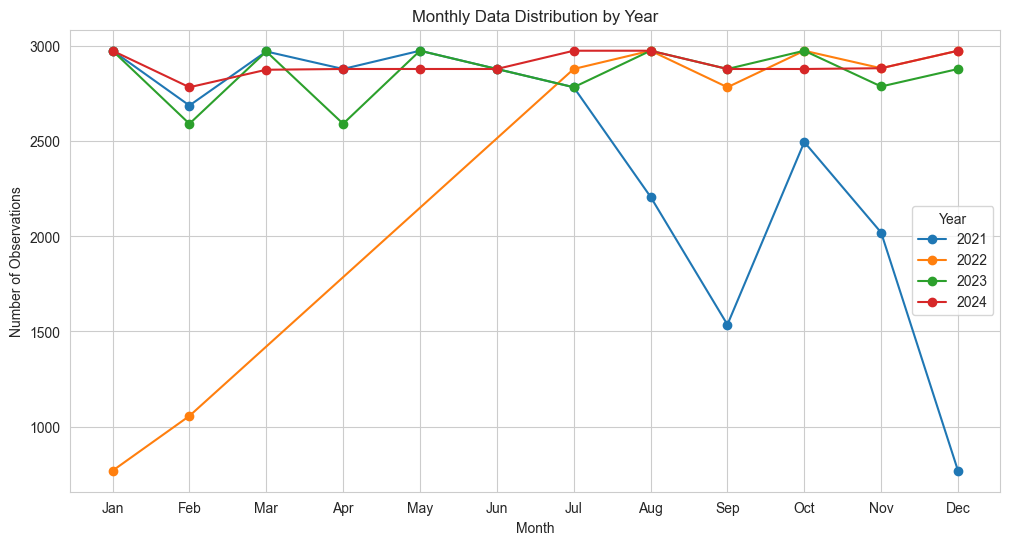

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['dateTimeStmp'] = pd.to_datetime(df['dateTimeStmp'])

df['Year'] = df['dateTimeStmp'].dt.year
df['Month'] = df['dateTimeStmp'].dt.month

monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Observations')

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

years = sorted(df['Year'].unique())

for year in years:
    subset = monthly_counts[monthly_counts['Year'] == year]
    plt.plot(subset['Month'], subset['Observations'], marker='o', label=str(year))

plt.title("Monthly Data Distribution by Year")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.grid(True)

plt.show()
